# Part 1

In [1]:
import pandas as pd
import numpy as np
np.random.seed(2021)

num_stocks = 1000 # number of stocks to use in the simulation

In [2]:
xls = pd.ExcelFile("Assignment_3_Data.xlsx")
df1 = pd.read_excel(xls, 'Firm Characteristics',skiprows=6,header=1) # Corporate/Financial Characteristics
df2 = pd.read_excel(xls, 'Aggregates',skiprows=7,header=1) # Aggregate summary data
df3 = pd.read_excel(xls, 'Stock Prices',header=1) # This is the time series data


In [3]:
# Add ticker info 
df1["Ticker"] = df1.apply(lambda row: row["Exchange:Ticker"].split(":")[-1], axis=1)

In [4]:
df1.head()

,Company Name,Exchange:Ticker,Security Tickers,P/BV [Latest] (x),P/TangBV [Latest] (x),TEV/LTM EBITDA [My Setting] [Latest] (x),P/LTM Normalized EPS [Latest] (x),Forward P/E - Capital IQ [NTM] (x),PEG Ratio - Capital IQ [NTM] (x),Return on Assets % [LTM],Return on Equity % [LTM],EBIT Margin % [LTM],"Total Revenues, 3 Yr CAGR % [LTM] (%)","Net Income, 3 Yr CAGR % [LTM] (%)",S&P Entity Credit Rating - Issuer Credit Rating - Local Currency LT [Latest] (Rating),"Market Capitalization [My Setting] [Latest] ($USDmm, Historical rate)",Dividend Yield [Latest] (%),12M Realized Price Volatility (Universe: S&P 500) (Cross Sectional Rank),Current Ratio [Latest Quarter],Ticker
0,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,NasdaqGS:FLWS; DB:FWC,2.25,4.01,7.43,25.5,20.9,1.1,5.49,16.8,3.88,16.4,42,-,632.6,-,-,2.06,FLWS
1,1st Source Corporation (NasdaqGS:SRCE),NasdaqGS:SRCE,NasdaqGS:SRCE,1.93,2.19,-,21.7,19,1.9,1.16,9.46,-,5.3,4.76,-,1369.9,1.44,-,-,SRCE
2,"2U, Inc. (NasdaqGS:TWOU)",NasdaqGS:TWOU,NasdaqGS:TWOU; DB:2U1,15.7,19.5,NM,NM,NM,-,-5.8,-12.6,-9.86,35.4,-,-,3261.8,-,-,3.28,TWOU
3,3D Systems Corporation (NYSE:DDD),NYSE:DDD,NYSE:DDD; XTRA:SYV; DB:SYV; BMV:DDD *; SWX:DDD,2.03,4.27,36.1,NM,21.4,0.891,-2,-5.2,-4.41,2.66,-,-,1313.3,-,-,2.93,DDD
4,3M Company (NYSE:MMM),NYSE:MMM,NYSE:MMM; XTRA:MMM; BASE:MMM; WBAG:MMM; BOVESP...,11.5,173.5,17.2,32.8,25.1,2.34,13,45.4,23.3,-0.716,4,AA-,140085.1,2,95,2.07,MMM


In [5]:
df3.dropna(axis="columns", inplace=True)
df3 = df3.apply(pd.to_numeric, errors='coerce').dropna(axis="columns")

In [6]:
sample = df3.drop(["Date", "IWV"], axis=1).sample(n=num_stocks, axis=1) # Don't need the date and IWV columns
sample

,JW.A,AN,THG,INTL,CTSH,CMCS.A,PODD,UMBF,CMI,BH,...,TKR,EGBN,BREW,VC,FHN,MASI,LMT,CLI,KBAL,AIV
0,39.76468,35.70,30.36332,24.37,32.71372,11.07783,19.06,34.87081,79.32695,322.39934,...,25.01937,13.74545,6.34,29.54772,7.53402,17.94430,67.25118,20.89907,3.88750,19.33691
1,38.93661,33.26,30.00010,24.16,32.83568,11.18411,19.09,34.83448,80.41601,330.05115,...,25.11336,13.56364,6.04,29.83735,7.61641,17.59170,66.34105,20.59825,3.90870,18.92034
2,39.62373,34.05,29.96551,24.18,33.49523,11.28360,19.12,35.79731,82.50700,329.91359,...,25.39532,13.78182,6.04,29.85473,7.72626,17.59170,65.65231,20.57450,3.91577,19.25359
3,39.91443,33.44,29.63688,24.03,33.05718,11.16375,18.74,35.51573,81.48764,322.04684,...,25.42665,13.82727,6.19,30.41660,7.79950,17.60123,65.57851,20.52700,3.88750,19.12029
4,39.22732,33.80,29.95686,24.27,33.17167,11.40119,18.26,36.17881,83.82258,325.66641,...,26.16602,13.91818,6.04,30.15594,7.86358,18.02054,65.62771,20.53492,3.87336,18.89535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,54.10000,45.68,98.10000,39.70,74.40000,36.55000,61.02,74.33000,177.23000,346.21000,...,50.55000,67.40000,18.30,122.56000,19.02000,88.65000,320.73000,22.83000,20.01000,44.11000
1462,54.30000,46.32,98.87000,39.79,74.69000,36.50000,59.65,74.35000,178.40000,352.87000,...,51.55000,67.35000,18.45,124.03000,19.24000,87.14000,313.15000,22.86000,19.97000,43.75000
1463,54.05000,46.68,98.84000,40.00,74.25000,36.83000,57.99,73.07000,176.92000,347.02000,...,49.10000,67.50000,18.15,121.99000,19.06000,86.59000,312.43000,22.83000,19.92000,43.70000
1464,54.60000,47.77,99.22000,40.40,74.58000,36.27000,58.50,74.05000,178.64000,353.69000,...,48.75000,67.05000,17.80,126.57000,19.16000,87.08000,307.89000,22.43000,20.01000,43.35000


In [7]:
returns_all = df3.drop(["Date"], axis=1).reset_index(drop=True).astype(float).pct_change()
returns_all = returns_all.iloc[1:, :] # all but first row, because we can't get the returns of the first day
mean_returns_all = returns_all.mean() # Average DAILY returns 
cov_matrix_all = returns_all.cov() # Average DAILY covariance 

In [8]:
returns = sample.reset_index(drop=True).astype(float).pct_change(1)
returns = returns.iloc[1:, :] # all but first row, because we can't get the returns of the first day
mean_returns = returns.mean() # Average DAILY returns 
cov_matrix = returns.cov() # Average DAILY covariance 

In [9]:
# Annualize the data
mu_all = (1 + mean_returns_all) ** 252 - 1
sigma_all = 252 * cov_matrix_all  # Annualize the covariance matrix. Sigma so we have to sqrt
var_all = pd.Series(np.diag(sigma_all), index=[sigma_all.index, sigma_all.columns])

mu = (1 + mean_returns) ** 252 - 1
sigma = 252 * cov_matrix 

n = mu.size # This is a 1D array
risk_free_rate = 0.0085 # On December 31st, 2016 1yr treasury note yield was 0.85%

In [10]:
def calculate_beta(returns_asset, returns_benchmark, variance_benchmark):
    return(np.cov(returns_asset, returns_benchmark) / variance_benchmark)
    

In [11]:
var_IWV = float(var_all["IWV"])
returns_IWV = returns_all["IWV"].reset_index(drop=True, inplace=True)
betas = returns.apply(lambda x:  calculate_beta(x, returns_IWV, var_IWV), axis=0)

In [12]:
# Generate random portfolios
def mu_portfolio(w: pd.DataFrame, mu: pd.DataFrame) -> float:
    return(w.T @ mu)

def sigma_portfolio(w: pd.DataFrame, sigma: pd.DataFrame) -> float:
    return(np.sqrt(w.T @ sigma @ w)) # Sqrt because it's variance

def beta_portfolio(w: pd.DataFrame, betas: pd.DataFrame) -> float:
    return(w.T @ betas)

def generate_random_portfolio(mu: pd.DataFrame, sigma: pd.DataFrame) -> dict:
    w = np.empty(0)
    for _ in range(len(mu)):
        w = np.append(w, np.random.uniform(0, 1))
    w = w / np.sum(w) # Make sure the sum of the weights is 1
    assert(np.isclose(np.sum(w), 1))
    w = np.random.permutation(w) # Shuffle the weights
    mu0 = mu_portfolio(w, mu)
    sigma0 = sigma_portfolio(w, sigma)
    beta0 = beta_portfolio(w, betas)
    return({"w": w, "mu": mu0, "sigma": sigma0, "beta" : beta0})

In [13]:
# Now we can generate a bunch of random portfolios
num_simulations = 100
random_portfolios = [generate_random_portfolio(mu, sigma) for _ in range(num_simulations)]

<AxesSubplot:xlabel='sigma', ylabel='mu'>

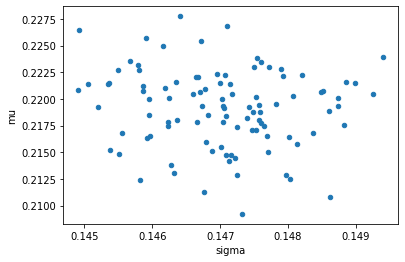

In [14]:
portfolio_df = pd.DataFrame(random_portfolios)
portfolio_df["Sharpe Ratio"] = portfolio_df.apply(lambda x : (x["mu"] - risk_free_rate) / x["sigma"], axis=1)
portfolio_df["Treynor Ratio"] = portfolio_df.apply(lambda x : (x["mu"] -  risk_free_rate) / x["beta"], axis=1)

portfolio_df.plot(x="sigma", y="mu", kind="scatter")

In [15]:
portfolio_df.sort_values(by="Sharpe Ratio", ascending=False).head(10)

,w,mu,sigma,beta,Sharpe Ratio,Treynor Ratio
46,"[0.0009609397446171602, 0.00015755493861370053...",0.226485,0.144917,0.034967,1.504207,6.233945
61,"[0.0005597479156489603, 0.0019914991409888732,...",0.227742,0.146406,0.036732,1.497499,5.968654
17,"[0.0006716001198544316, 0.0013745323873955433,...",0.225670,0.145901,0.036614,1.488478,5.931385
90,"[0.0009263354373108567, 0.00044573474252728856...",0.226801,0.147104,0.036494,1.483991,5.981773
27,"[0.0013769487508589842, 0.001287482818566456, ...",0.224928,0.146151,0.036161,1.480850,5.985068
55,"[0.000581817236563814, 0.00016677352700624845,...",0.225424,0.146716,0.035506,1.478535,6.109459
54,"[0.001903299611863446, 0.000265428365408153, 0...",0.223514,0.145679,0.036115,1.475945,5.953533
4,"[0.0005559223405773823, 0.0004472663273259001,...",0.223130,0.145789,0.035582,1.472195,6.031891
0,"[0.001742010022301557, 0.001300735223083608, 0...",0.222681,0.145500,0.035828,1.472028,5.978067
49,"[0.0019425537160794534, 0.0016711189985352394,...",0.222743,0.145802,0.035220,1.469413,6.083001


In [46]:
d1 = {}
for i in range(len(portfolio_df["w"][0])):
    d1[sample.columns[i]] = portfolio_df["w"][0][i]

d1

{'JW.A': 0.001742010022301557,
 'AN': 0.001300735223083608,
 'THG': 0.00040893556818795223,
 'INTL': 0.0014467229507023275,
 'CTSH': 0.0007490037262406355,
 'CMCS.A': 0.001849311462238148,
 'PODD': 0.0006369712543045328,
 'UMBF': 0.00019444944207547038,
 'CMI': 0.0010915781437486644,
 'BH': 0.0014514664085586956,
 'CLX': 0.00026634822819280435,
 'FLS': 0.001146766954938084,
 'GFF': 0.001564083159779544,
 'ASTE': 0.0019232710479789514,
 'BHGE': 0.0006498936402384217,
 'UCBI': 0.0008613501871039356,
 'IFF': 0.00032495601168760363,
 'DSW': 0.00011471400992908289,
 'ADI': 0.0014440335998384577,
 'VGR': 0.000631046761109594,
 'TRIP': 0.0005756823761829193,
 'KW': 0.0007639339662685001,
 'SKX': 0.0017624047217566564,
 'GES': 0.0019458266921967883,
 'MBFI': 0.0013958125734325926,
 'IDTI': 3.672684447324451e-05,
 'GLUU': 0.0019310706279498239,
 'EQC': 0.0019184926282467367,
 'CME': 0.0011929589741233114,
 'NVLN': 0.0011623830068842672,
 'STC': 0.0003074316648824957,
 'BFS': 0.00018349373501100

# Part 2

In [16]:
def calculate_zscore(row, metric_name, portofolio_mu, portfolio_sigma):
    return((row[metric_name] - portofolio_mu) / portfolio_sigma)

In [17]:
# mean_pbv = float(df2["P/BV [Latest] (x)"].iloc[[1]])
# sd_pbv = float(df2["P/BV [Latest] (x)"].iloc[[4]])
# z_score_pbv = -(df2["P/BV [Latest] (x)"] - mean_pbv) / sd_pbv

In [39]:
sample_2 = df1.sample(n=num_stocks)

In [40]:
# Calculate all the Z-Scores
cols = sample_2.columns[3:]
cols = list(cols)
cols.remove("Ticker")
for col in cols:
    sample_2[col] = sample_2[col].apply(pd.to_numeric, errors='coerce')
    metric_mu = sample_2[col].mean()
    metric_sd = sample_2[col].std()
    sample_2["Z-Score " + col] = sample_2.apply(lambda row: calculate_zscore(row, col, metric_mu, metric_sd), axis=1)

In [41]:
# Make a heuristic value score based on summing all the Z-Scores
def calculate_value_score(row, cols):
    return(np.sum(row["Z-Score " + col] for col in cols))

In [42]:
# Construct Portfolio
# We assume that all Z-Scores are evenly valuable 
sample_2.fillna(0, inplace=True)
sample_2["Average Score"] = sample_2.apply(lambda row: calculate_value_score(row, cols) / len(cols), axis=1)

min_score = sample_2["Average Score"].min()


# Scale the score to generate the weights
sample_2["Average Score"] = sample_2["Average Score"] - min_score


/var/folders/s4/kp5y4dr14d19trtzc9ydqxvm0000gn/T/ipykernel_34663/663119225.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return(np.sum(row["Z-Score " + col] for col in cols))


In [43]:
# Generate Weights
sum_scores = sum(sample_2["Average Score"])
sample_2["Weights"] = sample_2.apply(lambda row: row["Average Score"] / sum_scores, axis=1)

In [44]:
weights = list(sample_2["Weights"])
tickers = list(sample_2["Ticker"])
d2 = {}
for i in range(len(tickers)):
    d2[tickers[i]] = weights[i]

d2

{'CWCO': 0.0009372137039836103,
 'SGYP': 0.0004470607801975267,
 'BC': 0.0008705258704162683,
 'HXL': 0.0009477583017125513,
 'RUN': 0.0007874615065952627,
 'GNRC': 0.0009616877823868264,
 'FSLR': 0.0011010235606285835,
 'CHS': 0.0009266042013442478,
 'COST': 0.0010228635053590083,
 'TSQ': 0.0009178941578670706,
 'ORM': 0.0011521828476460253,
 'SGH': 0.0009543463896777129,
 'CBL': 0.0011149642960340273,
 'SANM': 0.0009058768595799283,
 'SR': 0.0009491259602370398,
 'FOSL': 0.0008578310254846139,
 'FLDM': 0.0007760380781833378,
 'ACNB': 0.0009299514056659409,
 'BLD': 0.0009572869740600175,
 'BF.B': 0.0011038369776971777,
 'LECO': 0.0009755995913144119,
 'ACTA': 0.0008987563943400064,
 'CLCT': 0.0011704621134093424,
 'ACLS': 0.0010530436408109185,
 'SBGI': 0.000996427133375668,
 'ALDR': 0.0007353824509814207,
 'CSTR': 0.0009870304144369878,
 'PRTY': 0.000912083215429611,
 'LW': 0.0010217241408992835,
 'AMBR': 0.0008830713741657266,
 'MSBI': 0.0009515530661017914,
 'RYAM': 0.0008817793179

# Part 3

In [ ]:
# We now backtest the portfolios